# Feature Selection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [4]:
df.shape

(3554, 18)

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,smart world gems,sector 89,0.95,8597.0,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,breez global hill view,sohna road,0.32,5470.0,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,suncity avenue,sector 102,0.48,9023.0,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


In [6]:
train_df = df.drop(columns = ['society','price_per_sqft'])

In [7]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 36,0.82,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,sector 89,0.95,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,sohna road,0.32,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,sector 92,1.60,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,sector 102,0.48,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


### Luxury score

<Axes: ylabel='luxury_score'>

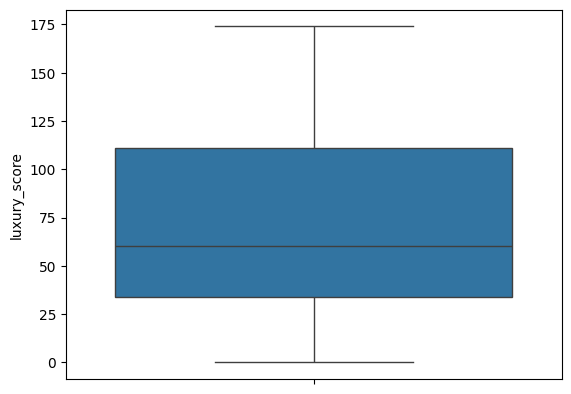

In [8]:
sns.boxplot(df['luxury_score'])

In [9]:
def categorize_luxury(score):
    if 0<= score < 50:
        return 'Low'
    elif 50 <= score < 150:
        return 'Medium'
    elif 150<= score < 170:
        return "High"
    else:
        return None
    
        

In [10]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [11]:
train_df

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 36,0.82,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,Low
1,flat,sector 89,0.95,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0,Low
2,flat,sohna road,0.32,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,Low
3,flat,sector 92,1.60,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0,None
4,flat,sector 102,0.48,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,flat,sector 84,0.37,2.0,2.0,1,5.0,Relatively New,532.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,Medium
3550,house,sector 109,6.00,5.0,5.0,3+,2.0,Relatively New,6228.0,1.0,1.0,1.0,1.0,0.0,0.0,160.0,High
3551,flat,sector 2,0.60,1.0,1.0,1,5.0,Moderately Old,665.0,0.0,0.0,0.0,0.0,0.0,1.0,67.0,Medium
3552,house,sector 43,15.50,5.0,6.0,3,3.0,Moderately Old,5490.0,1.0,1.0,1.0,1.0,0.0,0.0,76.0,Medium


### FloorNUM

<Axes: ylabel='floorNum'>

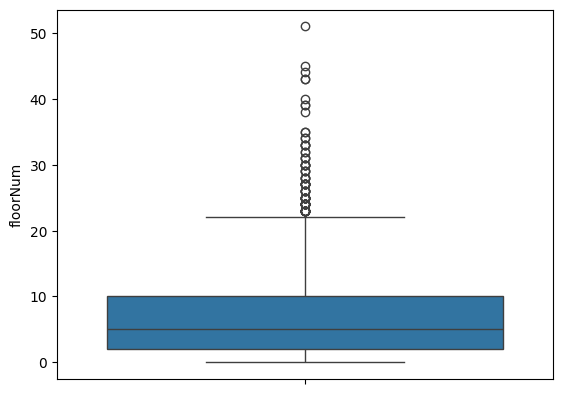

In [12]:
sns.boxplot(df['floorNum'])

In [13]:
def categorize_floor(floor):
    if 0<= floor < 2:
        return 'Low Floor'
    elif 3<= floor <= 10:
        return 'Med Floor'
    elif 11<= floor <= 51:
        return "High Floor"
    else:
        return None
    

In [14]:
train_df['Floor_categorize'] = df['floorNum'].apply(categorize_floor)

In [15]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,Floor_categorize
0,flat,sector 36,0.82,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,Low,None
1,flat,sector 89,0.95,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0,Low,Med Floor
2,flat,sohna road,0.32,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,Low,High Floor
3,flat,sector 92,1.60,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0,None,Med Floor
4,flat,sector 102,0.48,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0,High,Med Floor


In [16]:
train_df.drop(columns = ['floorNum','luxury_score'],inplace=True)

In [17]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,Floor_categorize
0,flat,sector 36,0.82,3.0,2.0,2,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,None
1,flat,sector 89,0.95,2.0,2.0,2,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,Low,Med Floor
2,flat,sohna road,0.32,2.0,2.0,1,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,High Floor
3,flat,sector 92,1.60,3.0,4.0,3+,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,None,Med Floor
4,flat,sector 102,0.48,2.0,2.0,1,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,High,Med Floor


In [18]:
#Applying ordinal encocder in the categorical data

In [19]:
from sklearn.preprocessing import OrdinalEncoder

In [20]:
#Create a copy of the ordinal data for the label encoding 

In [21]:
data_label_encoded = train_df.copy()

In [22]:
#.select_dtypes(include=['object'])
#This function selects columns in the DataFrame that have data types included in the list.
#In this case, it’s selecting columns with data type 'object', which usually means textual (categorical) data like names, categories, labels, etc.

In [23]:
categorical_cols = train_df.select_dtypes(include=['object']).columns

In [24]:
#Applying label encoding to the categorical column

In [25]:
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 10', 'sector 102', 'sector 103', 'sector 104',
       'sector 105', 'sector 106', 'sector 107', 'sector 108',
       'sector 109', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 30', 'sector 31', 'sector 33',
       'sector 36', 'sector 37', 'sector 37d', 'sector 38', 'sector 39',
       'sector 4', 'sector 40', 'sector 41', 'sector 43', 'sector 45',
       'sector 46', 'sector 47', 'sector 48', 'sector 49', 'sector 5',
       'sector 50', 'sector 51', 'sector 52', 'sector 53', 'sector 54',
       'sector 55', 'sector 56', 'sector 57', 'sector 58', 'sector 59',
       'sector 6', 'sector 60', 'sector 61', 'sector 62', 

In [26]:
X_label = data_label_encoded.drop(columns =['price'],axis = 1)
y_label = data_label_encoded['price']

In [27]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,Floor_categorize
0,0.0,36.0,3.0,2.0,2.0,1.0,850.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
1,0.0,95.0,2.0,2.0,2.0,1.0,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
2,0.0,103.0,2.0,2.0,1.0,1.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,99.0,3.0,4.0,4.0,3.0,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,3.0,2.0
4,0.0,5.0,2.0,2.0,1.0,3.0,582.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,90.0,2.0,2.0,1.0,3.0,532.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
3550,1.0,12.0,5.0,5.0,4.0,3.0,6228.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,3.0
3551,0.0,23.0,1.0,1.0,1.0,0.0,665.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0
3552,1.0,44.0,5.0,6.0,3.0,0.0,5490.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,2.0


### Technique1 - Correlation analysis

<Axes: >

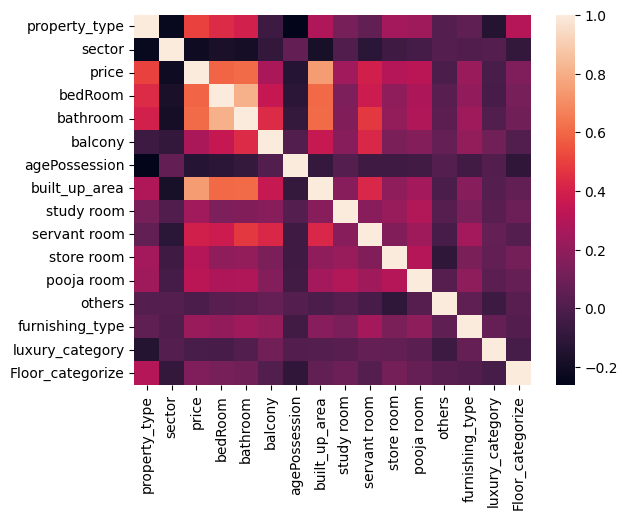

In [28]:
sns.heatmap(data_label_encoded.corr())

In [29]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})


In [30]:
fi_df1

,feature,corr_coeff
0,sector,-0.212084
1,price,1.000000
2,bedRoom,0.591289
3,bathroom,0.609777
4,balcony,0.269637
5,agePossession,-0.134171
6,built_up_area,0.748574
7,study room,0.242955
8,servant room,0.391930
9,store room,0.305677


### Technique2 : RandomForest

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
#Training randomForest on the label Encoder

In [33]:
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label,y_label)

RandomForestRegressor(random_state=42)

In [34]:
#Extarcting the feature importance

In [35]:
fi_df2 = pd.DataFrame({
    'features' : X_label.columns,
    'rf_importance' : rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

In [36]:
fi_df2

,features,rf_importance
6,built_up_area,0.650457
1,sector,0.101403
0,property_type,0.100064
3,bathroom,0.025802
2,bedRoom,0.024336
8,servant room,0.018960
5,agePossession,0.013972
4,balcony,0.011808
12,furnishing_type,0.010181
14,Floor_categorize,0.009719


### Techniquie3 - Gradient boosting feature importance

In [37]:
from sklearn.ensemble import GradientBoostingRegressor

#Train the gradient boosting on the label 
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label,y_label)

#Extract the feature importance score

fi_df3 = pd.DataFrame({
    'features' : X_label.columns,
    'gb_importances' : gb_label.feature_importances_
}).sort_values(by = 'gb_importances',ascending = False )

In [38]:
fi_df3

,features,gb_importances
6,built_up_area,0.678376
1,sector,0.102356
0,property_type,0.098189
2,bedRoom,0.037957
3,bathroom,0.035828
8,servant room,0.023142
9,store room,0.010349
5,agePossession,0.003767
7,study room,0.002909
12,furnishing_type,0.002552


### Technique - 4 (Permutation Importance)

In [39]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label ,y_test_label = train_test_split(X_label,y_label, test_size = 0.2, random_state = 2)

#Train a rando forest on the label data
rf_label = RandomForestRegressor(n_estimators=100 ,random_state = 42)
rf_label.fit(X_train_label ,y_train_label)

RandomForestRegressor(random_state=42)

In [40]:
#Calculate the permutation importance

perm_importance = permutation_importance(rf_label,X_test_label,y_test_label,n_repeats = 30 ,random_state = 42)

In [41]:
#Organize the result into the data frame

In [43]:
fi_df4 = pd.DataFrame({
    'features' : X_label.columns,
    'permutation_importances' : perm_importance.importances_mean
}).sort_values(by = 'permutation_importances',ascending = False)

In [44]:
fi_df4

,features,permutation_importances
6,built_up_area,0.757214
0,property_type,0.210225
1,sector,0.144041
8,servant room,0.021655
3,bathroom,0.019798
2,bedRoom,0.016642
9,store room,0.012245
10,pooja room,0.006992
7,study room,0.005525
13,luxury_category,0.002744


### TEchnique - 5(Lasso)

In [45]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

#standardize the feature

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

#Train a lasso function

lasso = Lasso(alpha=0.01,random_state = 42)
lasso.fit(X_scaled,y_label)

#Extarct the coefficient

fi_df5  =pd.DataFrame({
    'features': X_label.columns,
    'lasso_coef' : lasso.coef_
}).sort_values(by = 'lasso_coef',ascending = False)

In [46]:
fi_df5

,features,lasso_coef
6,built_up_area,1.512763
0,property_type,0.708020
3,bathroom,0.275373
9,store room,0.201416
7,study room,0.172188
12,furnishing_type,0.159548
8,servant room,0.156035
10,pooja room,0.073652
2,bedRoom,0.014986
14,Floor_categorize,0.011921


### Technique - 6(RFE)

In [55]:
from sklearn.feature_selection import RFE

#Initailise the base  estimators 
estimators = RandomForestRegressor()

#Applying the RFE on the label encoder 
selector_label = RFE(estimators, n_features_to_select=X_label.shape[1],step = 1)
selector_label  = selector_label.fit(X_label,y_label)

#GEt the selected feature base on  the RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_


#Organize the result into the dat aframe

fi_df6  = pd.DataFrame({
    'features' : selected_features,
    'rfe_scores' : selected_coefficients
}).sort_values(by = 'rfe_scores',ascending = False)


In [56]:
fi_df6

,features,rfe_scores
6,built_up_area,0.651001
1,sector,0.102943
0,property_type,0.099410
3,bathroom,0.026279
2,bedRoom,0.025010
8,servant room,0.018337
5,agePossession,0.013869
4,balcony,0.011943
14,Floor_categorize,0.009901
12,furnishing_type,0.009624


### Technique -7 (Linear REgression weight )

In [57]:
from sklearn.linear_model import LinearRegression

lin_reg  = LinearRegression()
lin_reg.fit(X_scaled ,y_label)

#Extarct the coefficient 
fi_df7 = pd.DataFrame({
    'features' : X_label.columns,
    'reg_coefs' : lin_reg.coef_
}).sort_values(by = 'reg_coefs', ascending  = False)

In [58]:
fi_df7

,features,reg_coefs
6,built_up_area,1.516977
0,property_type,0.701351
3,bathroom,0.282054
9,store room,0.206006
7,study room,0.179944
12,furnishing_type,0.167994
8,servant room,0.163959
10,pooja room,0.077465
14,Floor_categorize,0.019977
2,bedRoom,0.017367


### Technique - 8 (Importing shap)

In [59]:
!pip install shap

   ---------------------------------------- 0.0/490.6 kB ? eta -:--:--
   ----- ---------------------------------- 61.4/490.6 kB 1.7 MB/s eta 0:00:01
   --------------------- ------------------ 266.2/490.6 kB 3.3 MB/s eta 0:00:01
   ---------------------------------------  481.3/490.6 kB 4.3 MB/s eta 0:00:01
   ---------------------------------------- 490.6/490.6 kB 3.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [61]:
import shap

In [62]:
# Computing the shap value using the trained RandomForest model

In [63]:
rf = RandomForestRegressor(n_estimators= 10, random_state=42)
rf.fit(X_label , y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

#Summing the absolute shap values

shap_sum = np.abs(shap_values).mean(axis = 0)

In [64]:
shap_values

array([[-1.84170433e-01,  1.46033757e-01, -1.83451961e-02, ...,
        -1.32623667e-02,  2.87866090e-03, -1.69297400e-02],
       [-2.00247999e-01, -3.88276435e-01, -3.01098207e-02, ...,
        -1.00605971e-02,  9.27926662e-04, -6.63849380e-03],
       [-1.76431044e-01, -4.12501735e-01, -2.62455984e-02, ...,
        -1.22664405e-02,  3.02077353e-03,  2.64134610e-03],
       ...,
       [-1.79976973e-01,  7.09774152e-02, -1.98378835e-03, ...,
         1.13958884e-02,  7.58666052e-03, -1.59214072e-02],
       [ 1.72459779e+00,  1.01180793e+00,  2.28502441e-01, ...,
         2.21610399e-01,  3.29223002e-02,  4.18732918e-02],
       [-3.01457890e-01,  2.36351740e-02,  6.24936858e-04, ...,
         2.89007231e-02, -2.57284194e-02,  3.69689576e-02]])

In [65]:
pd_df8  = pd.DataFrame({
    'features' : X_label.columns,
    'Shap_scores' : np.abs(shap_values).mean(axis = 0)
}).sort_values(by= 'Shap_scores',ascending = False)

In [66]:
pd_df8

,features,Shap_scores
6,built_up_area,1.244656
0,property_type,0.484468
1,sector,0.380285
3,bathroom,0.112464
8,servant room,0.089919
4,balcony,0.046724
2,bedRoom,0.042804
12,furnishing_type,0.032931
14,Floor_categorize,0.032280
5,agePossession,0.029365


In [70]:
final_fi_df = fi_df1.merge(fi_df2,on='features').merge(fi_df3,on='features').merge(fi_df4,on='features').merge(fi_df5,on='features').merge(fi_df6,on='features').merge(fi_df7,on='features').merge(fi_df8,on='features').set_index('features')

KeyError: 'features'

In [71]:
#with all the cols

In [73]:
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100 ,random_state=42)

scores = cross_val_score(rf ,X_label ,y_label , cv= 10 ,scoring = 'r2')

In [75]:
scores.mean()

0.8037656710552765

In [77]:
rf = RandomForestRegressor(n_estimators= 100, random_state= 42)

scores = cross_val_score(rf, X_label.drop(columns = ['pooja room', 'study room', 'others']),y_label, cv = 5 ,scoring = 'r2')

In [78]:
scores.mean()

0.8172349349249053

In [79]:
export_df = X_label.drop(columns = ['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [80]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,Floor_categorize,price
0,0.0,36.0,3.0,2.0,2.0,1.0,850.0,0.0,0.0,0.0,1.0,3.0,0.82
1,0.0,95.0,2.0,2.0,2.0,1.0,1226.0,1.0,0.0,0.0,1.0,2.0,0.95
2,0.0,103.0,2.0,2.0,1.0,1.0,1000.0,0.0,0.0,0.0,1.0,0.0,0.32
3,0.0,99.0,3.0,4.0,4.0,3.0,1615.0,1.0,0.0,1.0,3.0,2.0,1.60
4,0.0,5.0,2.0,2.0,1.0,3.0,582.0,0.0,1.0,0.0,0.0,2.0,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,90.0,2.0,2.0,1.0,3.0,532.0,0.0,0.0,0.0,2.0,2.0,0.37
3550,1.0,12.0,5.0,5.0,4.0,3.0,6228.0,1.0,1.0,0.0,0.0,3.0,6.00
3551,0.0,23.0,1.0,1.0,1.0,0.0,665.0,0.0,0.0,1.0,2.0,2.0,0.60
3552,1.0,44.0,5.0,6.0,3.0,0.0,5490.0,1.0,1.0,0.0,2.0,2.0,15.50


In [81]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv',index = False)